# **Licenciatura em Ciências da Computação**

### Aprendizagem Computacional 25/26

## Recap: Data Preprocessing and Clustering with Iris Dataset

### 1. Loading the Iris Dataset

First, let's load the Iris dataset, which is a popular dataset for classification and clustering tasks. It contains measurements of sepal length, sepal width, petal length, and petal width for three species of iris flowers.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for better viewing
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = iris.target_names[y]

print("First 5 rows of the Iris dataset:")
display(iris_df.head())

First 5 rows of the Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Number of Species
print("Number of Species in the Iris dataset:", len(iris.target_names))

Number of Species in the Iris dataset: 3


### 2. StandardScaler: Feature Scaling

`StandardScaler` is used to standardize features by removing the mean and scaling to unit variance. This process is crucial for many machine learning algorithms, especially those that rely on distance metrics (like PCA and KMeans), because features with a larger range might dominate the distance calculation.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for viewing
X_scaled_df = pd.DataFrame(data=X_scaled, columns=iris.feature_names)

print("First 5 rows of the scaled Iris dataset:")
display(X_scaled_df.head())

First 5 rows of the scaled Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### 3. PCA: Dimensionality Reduction

Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of a dataset while retaining most of the variance. It transforms the data into a new coordinate system where the axes (principal components) are orthogonal and capture the maximum variance. Here, we'll reduce the 4 features to 2 principal components for easy visualization.

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA to reduce to 2 components
pca = PCA(n_components=2)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for viewing
X_pca_df = pd.DataFrame(data=X_pca, columns=['principal_component_1', 'principal_component_2'])

print("First 5 rows of the PCA-transformed Iris dataset:")
display(X_pca_df.head())

First 5 rows of the PCA-transformed Iris dataset:


,principal_component_1,principal_component_2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


### 4. KMeans: Clustering

K-Means is a popular unsupervised learning algorithm used for clustering. It aims to partition `n` observations into `k` clusters in which each observation belongs to the cluster with the nearest mean (centroid). Since we know there are 3 species in the Iris dataset, we'll set `n_clusters=3`.

First 5 rows of PCA-transformed data with cluster assignments:


,principal_component_1,principal_component_2,cluster,species_true
0,-2.264703,0.480027,1,setosa
1,-2.080961,-0.674134,1,setosa
2,-2.364229,-0.341908,1,setosa
3,-2.299384,-0.597395,1,setosa
4,-2.389842,0.646835,1,setosa


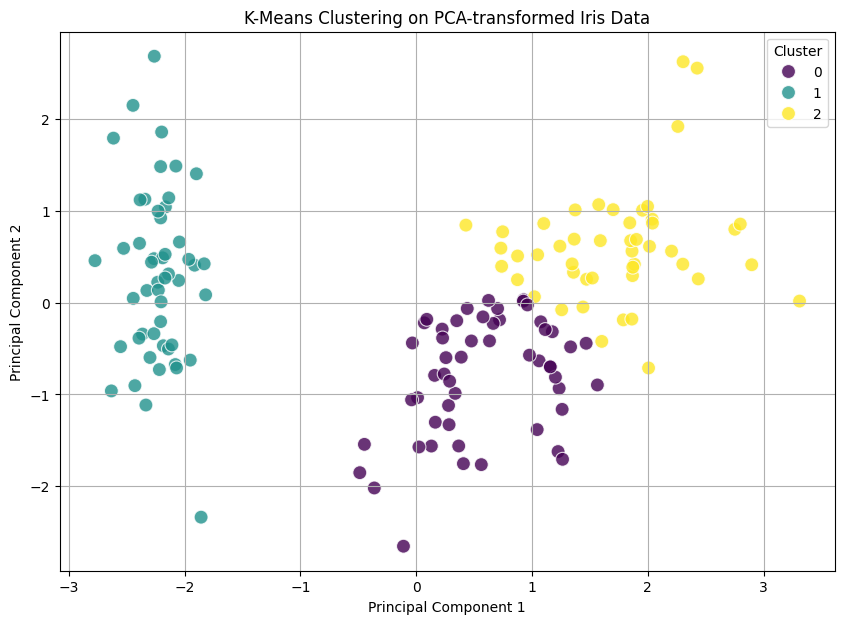

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init to suppress warning

# Fit KMeans to the PCA-transformed data and predict clusters
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to our PCA DataFrame
X_pca_df['cluster'] = clusters
X_pca_df['species_true'] = iris.target_names[y]

print("First 5 rows of PCA-transformed data with cluster assignments:")
display(X_pca_df.head())

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=X_pca_df, palette='viridis', s=100, alpha=0.8)
plt.title('K-Means Clustering on PCA-transformed Iris Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

This recap demonstrates how `StandardScaler` normalizes data, `PCA` reduces dimensions for better visualization and understanding, and `KMeans` groups similar data points into clusters. Notice how the clusters formed by KMeans largely correspond to the actual species of the Iris flowers, showcasing the effectiveness of these techniques.